# 데이터프레임 합치기

-   두개 이상의 DataFrame을 합쳐 하나의 DataFrame으로 만든다.

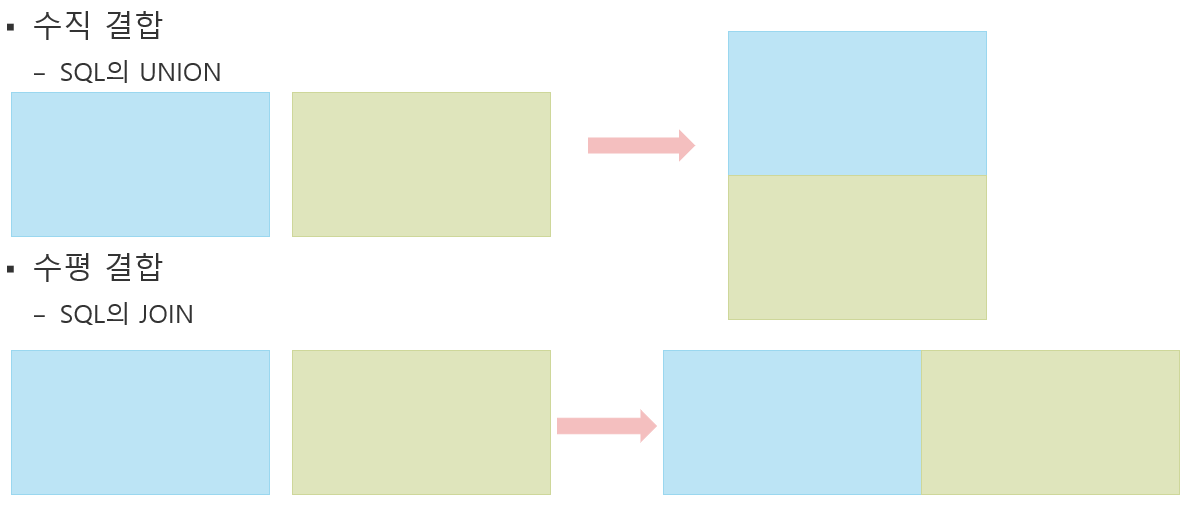


-   **수직결합**
    -   **단순결합**: 여러개의 DataFrame들의 같은 컬럼끼리 수직으로 합친다. 보통 하나의 데이터를 나눈 것을 다시 하나로 합칠  때 적용.
-   **수평결합**
    - **JOIN**: 연관성 있는 여러 데이터를 하나로 합쳐서 조회하는 JOIN 처리를 한다.
        -   JOIN은 합치려는 DataFrame들의 index 나 특정 컬럼의 값이 같은 행 끼리 합친다.
    - **단순결합**: 여러개의 DataFrame들의 같은 컬럼끼리 수평으로 합친다. 보통 하나의 데이터를 나눈 것을 다시 하나로 합칠  때 적용.


### 데이터셋 읽기

-   stocks_2016.csv, stocks_2017.csv, stocks_2018.csv : 년도별 보유 주식
-   stocks_info.csv : 주식 정보


In [1]:
from glob import glob
glob?

Signature:
glob(
    pathname,
    *,
    root_dir=None,
    dir_fd=None,
    recursive=False,
    include_hidden=False,
)
Docstring:
Return a list of paths matching a pathname pattern.

The pattern may contain simple shell-style wildcards a la
fnmatch. Unlike fnmatch, filenames starting with a
dot are special cases that are not matched by '*' and '?'
patterns by default.

If `include_hidden` is true, the patterns '*', '?', '**'  will match hidden
directories.

If `recursive` is true, the pattern '**' will match any files and
zero or more directories and subdirectories.
File:      c:\users\playdata\appdata\local\programs\python\python313\lib\glob.py
Type:      function

In [7]:
#############################################################################################
# - glob 모듈
#   -  glob 모듈은 파일 경로 내에서 패턴 매칭을 사용해 특정 파일이나 디렉토리를 쉽게 검색할 수 있도록 도와주는 모듈이다.
#   - 패턴지정을 위한 wildcard 문자(*, **)
#      - *: 0개이상의 모든 문자들
#      - **: 디렉토리 경로에 사용. 모든 하위 디렉토리들.
# glob(pathname_패턴): 지정된 패턴과 일치하는 모든 파일과 디렉토리의 경로 문자열을 리스트로 반환
# glob(pathname_패턴, recursive=True): pathname패턴에 **이 포함되어 있고 recursive=True 옵션을 사용하면 하위 디렉토리까지 재귀적으로 검색
#############################################################################################

from glob import glob

glob("data/*.csv")
glob("data/s*.csv")
glob('./**/*.csv', recursive=True)

['.\\data\\diamonds.csv',
 '.\\data\\flights.csv',
 '.\\data\\movie.csv',
 '.\\data\\stocks_2016.csv',
 '.\\data\\stocks_2017.csv',
 '.\\data\\stocks_2018.csv',
 '.\\data\\stocks_info.csv',
 '.\\data\\test_data\\diamonds.csv',
 '.\\data\\test_data\\flights.csv',
 '.\\data\\test_data\\movie.csv',
 '.\\data\\test_data\\stocks_2016.csv',
 '.\\data\\test_data\\stocks_2017.csv',
 '.\\data\\test_data\\stocks_2018.csv',
 '.\\data\\test_data\\stocks_info.csv',
 '.\\saved_data\\grade1.csv',
 '.\\saved_data\\grade2.csv',
 '.\\saved_data\\grade3.csv',
 '.\\saved_data\\grade4.csv',
 '.\\saved_data\\grade5.csv',
 '.\\saved_data\\grade6.csv',
 '.\\saved_data\\grade7.csv',
 '.\\saved_data\\student_grade.csv']

In [10]:
import pandas as pd
from glob import glob
file_names = glob("data/s*.csv")
file_names
stock_2016, stock_2017, stock_2018, stock_info = [pd.read_csv(file_name) for file_name in file_names]

In [11]:
stock_2016

,Symbol,Shares,Low,High
0,AAPL,80,95,110
1,TSLA,50,80,130
2,WMT,40,55,70


In [12]:
stock_2017

,Symbol,Shares,Low,High
0,AAPL,50,120,140
1,GE,100,30,40
2,IBM,87,75,95
3,SLB,20,55,85
4,TXN,500,15,23
5,TSLA,100,100,300


In [13]:
stock_2018

,Symbol,Shares,Low,High
0,AAPL,40,135,170
1,AMZN,8,900,1125
2,TSLA,50,220,400


In [14]:
stock_info

,Symbol,Name,Info
0,AAPL,Apple Inc,Apple Inc. is an American multinational techno...
1,TSLA,Tesla Inc,Tesla Inc. is an American electric vehicle and...
2,WMT,Walmart Inc,Walmart Inc. is an American multinational reta...
3,GE,General Electric,General Electric is an American multinational ...
4,IBM,IBM(International Business Machines Co),IBM is an American multinational technology co...
5,SLB,Schlumberger Limited.,Schlumberger Limited is the world's largest oi...
6,TXN,Texas Instruments Incorporated,Texas Instruments is an American technology co...
7,AMZN,"Amazon.com, Inc","Amazon.com, Inc. is an American multinational ..."


## concat() 이용

-   수직, 수평 결합 모두 지원한다.
-   하나의 데이터셋을 여러 DataFrame으로 나눈 것을 하나의 DataFrame으로 합칠 때 사용한다.


-   **수직 결합** (행이 늘어나도록 합친다.)
    -   **컬럼명이 같은 열끼리 합친다.**
    -   같은 column 명이 없는 열들도 결과 DataFrame에 들어간다.(default)
        -   full outer join개념
-   **수평결합** (열이 늘어나도록 합친다.)
    -   **index명이 같은 행 끼리 합친다.** (equi-join)
    -   같은 index명이 없는 행들도 결과 DataFrame에 들어간다.(default)
        -   full outer join


-   pd.concat(objs, [, key=리스트]), axis=0, join='outer' )
    -   매개변수
        -   objs: 합칠 DataFrame들을 리스트로 전달
        -   keys=[] 를 이용해 합친 행들을 구분하기 위한 다중 인덱스 처리
        -   axis
            -   0 또는 index : 수직결합
            -   1 또는 columns : 수평결합
        -   join:
            -   합치는 방식으로 다음 문자열을 값으로 설정한다.
                -   'outer'(기본값): full outer join
                -   'inner': inner join (동일한 index명, column명 끼리 합친다.)


> ### 조인(join)
>
> -   여러 데이터프레임에 흩어져 있는 정보 중 필요한 정보만 모아서 결합하기 위한 것.
> -   두개 이상의 데이터프레임을 특정 컬럼(열)의 값이 같은 행 끼리 수평 결합하는 것.
> -   Inner Join, Left Outer Join, Right Outer Join, Full Outer Join


In [18]:
result = pd.concat([stock_2016, stock_2017])  # axis=0 (default: 0 - 수직) # 열이름이 같은 열끼리 합친다.
# result.reset_index(drop=True)
result

,Symbol,Shares,Low,High
0,AAPL,80,95,110
1,TSLA,50,80,130
2,WMT,40,55,70
0,AAPL,50,120,140
1,GE,100,30,40
2,IBM,87,75,95
3,SLB,20,55,85
4,TXN,500,15,23
5,TSLA,100,100,300


In [ ]:
pd.concat([stock_2016, stock_2017],  axis=1) # 행이름이 같은 행끼리 합친다. - full outer join (outer)
pd.concat([stock_2016, stock_2017],  axis=1, join="inner") # inner join

,Symbol,Shares,Low,High,Symbol,Shares,Low,High
0,AAPL,80,95,110,AAPL,50,120,140
1,TSLA,50,80,130,GE,100,30,40
2,WMT,40,55,70,IBM,87,75,95


In [21]:
result = pd.concat([stock_2016, stock_2017, stock_2018]) # axis=0, join="outer"
result

,Symbol,Shares,Low,High
0,AAPL,80,95,110
1,TSLA,50,80,130
2,WMT,40,55,70
0,AAPL,50,120,140
1,GE,100,30,40
2,IBM,87,75,95
3,SLB,20,55,85
4,TXN,500,15,23
5,TSLA,100,100,300
0,AAPL,40,135,170


In [24]:
result.loc[1]
# result.loc[5]

,Symbol,Shares,Low,High
1,TSLA,50,80,130
1,GE,100,30,40
1,AMZN,8,900,1125


In [25]:
result2 = pd.concat(
    [stock_2016, stock_2017, stock_2018], 
    ignore_index=True # 합치는 대상 DataFrame들의 index name들을 무시한다.
)
result2

,Symbol,Shares,Low,High
0,AAPL,80,95,110
1,TSLA,50,80,130
2,WMT,40,55,70
3,AAPL,50,120,140
4,GE,100,30,40
5,IBM,87,75,95
6,SLB,20,55,85
7,TXN,500,15,23
8,TSLA,100,100,300
9,AAPL,40,135,170


In [26]:
result3 = pd.concat(
    [stock_2016, stock_2017, stock_2018], 
    keys=['2016년', '2017년', '2018년'] # 각 DataFrame을 구분할 수있는 index를 지정. 
)

result3

Symbol  Shares  Low  High
2016년 0   AAPL      80   95   110
      1   TSLA      50   80   130
      2    WMT      40   55    70
2017년 0   AAPL      50  120   140
      1     GE     100   30    40
      2    IBM      87   75    95
      3    SLB      20   55    85
      4    TXN     500   15    23
      5   TSLA     100  100   300
2018년 0   AAPL      40  135   170
      1   AMZN       8  900  1125
      2   TSLA      50  220   400

In [28]:
result3.to_csv("saved_data/all_stocks.csv")

In [ ]:
result3.loc['2017년']  # 멀티 인덱스의 level0 조회.

,Symbol,Shares,Low,High
0,AAPL,50,120,140
1,GE,100,30,40
2,IBM,87,75,95
3,SLB,20,55,85
4,TXN,500,15,23
5,TSLA,100,100,300


In [29]:
result3.index

MultiIndex([('2016년', 0),
            ('2016년', 1),
            ('2016년', 2),
            ('2017년', 0),
            ('2017년', 1),
            ('2017년', 2),
            ('2017년', 3),
            ('2017년', 4),
            ('2017년', 5),
            ('2018년', 0),
            ('2018년', 1),
            ('2018년', 2)],
           )

In [ ]:
result3.loc[('2017년', 1)] # 한행.
result3.loc[[('2017년', 0), ("2018년", 2), ("2016년", 0)]] # 여러행 조회(fancy indexing)

,,Symbol,Shares,Low,High
2017년,0,AAPL,50,120,140
2018년,2,TSLA,50,220,400
2016년,0,AAPL,80,95,110


In [33]:
result3

Symbol  Shares  Low  High
2016년 0   AAPL      80   95   110
      1   TSLA      50   80   130
      2    WMT      40   55    70
2017년 0   AAPL      50  120   140
      1     GE     100   30    40
      2    IBM      87   75    95
      3    SLB      20   55    85
      4    TXN     500   15    23
      5   TSLA     100  100   300
2018년 0   AAPL      40  135   170
      1   AMZN       8  900  1125
      2   TSLA      50  220   400

In [34]:
result3.xs(1, level=-1, axis=0)
# dataframe.xs(조회할 index/column, level, 축방향(0:행, 1:열))
## 행이나 열을 조회하는 메소드. 주로 다중 인덱스일 때 사용.
## Level은 다중인덱스의 단계를 표현한다. 바깥쪽부터 안쪽으로 0부터 1씩 증가하는 level을 가진다. (음수 index도 적용가능.)

,Symbol,Shares,Low,High
2016년,TSLA,50,80,130
2017년,GE,100,30,40
2018년,AMZN,8,900,1125


## 조인을 통한 DataFrame 합치기

-   연관성있는 둘 이상의 DataFrame을 하나로 합친다.
    -   ex) 고객과 주문정보, 교수와 수업정보, 직원과 부서정보
-   **join()**
    -   **2개 이상**의 DataFrame을 조인할 때 사용
-   **merge()**
    -   **2개의** DataFrame의 조인만 지원


### join()

-   dataframe객체.join(others, how='left', lsuffix='', rsuffix='')
-   `df_A.join(df_b)`, `df_A.join([df_b, df_c, df_d])`
-   두개 이상의 DataFrame들을 조인 할 수 있다.
    -   **조인 기준**: index name이 같은 값인 행끼리 합친다. (equi-join)
    -   **조인 기본 방식**: Left Outer Join
-   매개변수
    -   lsuffix, rsuffix
        -   합치는 DataFrame들 간에 **같은 이름의 컬럼이 있으면 exception 발생**
        -   같은 이름이 있는 경우 붙일 접미어 지정
    -   how :조인방식. 'left', 'right', 'outer', 'inner'. left가 기본

In [36]:
print(stock_info.columns, stock_2016.columns)

Index(['Symbol', 'Name', 'Info'], dtype='object') Index(['Symbol', 'Shares', 'Low', 'High'], dtype='object')


In [38]:
# stock_info (source-main 정보) + stock_2016 (target - 부가 정보)
# stock_info.join(stock_2016)  # Error: 같은 이름의 컬럼명이 있음.(Symbol)
stock_info.join(stock_2018, lsuffix="_info") # join 기준: index이름이 같은 행끼리 join

,Symbol_info,Name,Info,Symbol,Shares,Low,High
0,AAPL,Apple Inc,Apple Inc. is an American multinational techno...,AAPL,40.0,135.0,170.0
1,TSLA,Tesla Inc,Tesla Inc. is an American electric vehicle and...,AMZN,8.0,900.0,1125.0
2,WMT,Walmart Inc,Walmart Inc. is an American multinational reta...,TSLA,50.0,220.0,400.0
3,GE,General Electric,General Electric is an American multinational ...,NaN,NaN,NaN,NaN
4,IBM,IBM(International Business Machines Co),IBM is an American multinational technology co...,NaN,NaN,NaN,NaN
5,SLB,Schlumberger Limited.,Schlumberger Limited is the world's largest oi...,NaN,NaN,NaN,NaN
6,TXN,Texas Instruments Incorporated,Texas Instruments is an American technology co...,NaN,NaN,NaN,NaN
7,AMZN,"Amazon.com, Inc","Amazon.com, Inc. is an American multinational ...",NaN,NaN,NaN,NaN


In [44]:
# index 이름을 맞추는 작업을 먼저 한다.
stock_info.set_index('Symbol').join(stock_2016.set_index('Symbol'))

# stock_info.set_index('Symbol').join(stock_2018.set_index('Symbol'))

,Name,Info,Shares,Low,High
Symbol,,,,,
AAPL,Apple Inc,Apple Inc. is an American multinational techno...,80.0,95.0,110.0
TSLA,Tesla Inc,Tesla Inc. is an American electric vehicle and...,50.0,80.0,130.0
WMT,Walmart Inc,Walmart Inc. is an American multinational reta...,40.0,55.0,70.0
GE,General Electric,General Electric is an American multinational ...,NaN,NaN,NaN
IBM,IBM(International Business Machines Co),IBM is an American multinational technology co...,NaN,NaN,NaN
SLB,Schlumberger Limited.,Schlumberger Limited is the world's largest oi...,NaN,NaN,NaN
TXN,Texas Instruments Incorporated,Texas Instruments is an American technology co...,NaN,NaN,NaN
AMZN,"Amazon.com, Inc","Amazon.com, Inc. is an American multinational ...",NaN,NaN,NaN


In [43]:
stock_info.set_index('Symbol').join(
    stock_2016.set_index('Symbol'), 
    how="inner" # inner join
)

,Name,Info,Shares,Low,High
Symbol,,,,,
AAPL,Apple Inc,Apple Inc. is an American multinational techno...,80,95,110
TSLA,Tesla Inc,Tesla Inc. is an American electric vehicle and...,50,80,130
WMT,Walmart Inc,Walmart Inc. is an American multinational reta...,40,55,70


In [ ]:
stock_2016.set_index('Symbol').join(
    stock_info.set_index('Symbol'), 
    how="right" # right outer join (오른쪽 DataFrame 기준 join)
)
# how: left, right, outer(full outer join),   inner

,Shares,Low,High,Name,Info
Symbol,,,,,
AAPL,80.0,95.0,110.0,Apple Inc,Apple Inc. is an American multinational techno...
TSLA,50.0,80.0,130.0,Tesla Inc,Tesla Inc. is an American electric vehicle and...
WMT,40.0,55.0,70.0,Walmart Inc,Walmart Inc. is an American multinational reta...
GE,NaN,NaN,NaN,General Electric,General Electric is an American multinational ...
IBM,NaN,NaN,NaN,IBM(International Business Machines Co),IBM is an American multinational technology co...
SLB,NaN,NaN,NaN,Schlumberger Limited.,Schlumberger Limited is the world's largest oi...
TXN,NaN,NaN,NaN,Texas Instruments Incorporated,Texas Instruments is an American technology co...
AMZN,NaN,NaN,NaN,"Amazon.com, Inc","Amazon.com, Inc. is an American multinational ..."


In [ ]:
# stock_info.join([stock_2016, stock_2017, stock_2018])

ValueError: Indexes have overlapping values: Index(['Symbol', 'Shares', 'Low', 'High'], dtype='object')

In [48]:
# DataFrame.add_suffix(접미어) # DataFrame의 모든 컬럼이름 뒤에 지정한 접미어를 뒤에 붙인다.
# DataFrame.add_prefix(접두어) # DataFrame의 모든 컬럼이름 뒤에 지정한 접두어를 앞에 붙인다.
stock_2016.add_suffix("_2016")
stock_2016.add_prefix("2016_")

,2016_Symbol,2016_Shares,2016_Low,2016_High
0,AAPL,80,95,110
1,TSLA,50,80,130
2,WMT,40,55,70


In [49]:
s_2016 = stock_2016.set_index('Symbol').add_suffix('_2016')
s_2017 = stock_2017.set_index('Symbol').add_suffix('_2017')
s_2018 = stock_2018.set_index('Symbol').add_suffix('_2018')

In [50]:
s_2018

,Shares_2018,Low_2018,High_2018
Symbol,,,
AAPL,40,135,170
AMZN,8,900,1125
TSLA,50,220,400


In [51]:
join = stock_info.set_index('Symbol').join([s_2016, s_2017, s_2018])
join

,Name,Info,Shares_2016,Low_2016,High_2016,Shares_2017,Low_2017,High_2017,Shares_2018,Low_2018,High_2018
Symbol,,,,,,,,,,,
AAPL,Apple Inc,Apple Inc. is an American multinational techno...,80.0,95.0,110.0,50.0,120.0,140.0,40.0,135.0,170.0
TSLA,Tesla Inc,Tesla Inc. is an American electric vehicle and...,50.0,80.0,130.0,100.0,100.0,300.0,50.0,220.0,400.0
WMT,Walmart Inc,Walmart Inc. is an American multinational reta...,40.0,55.0,70.0,NaN,NaN,NaN,NaN,NaN,NaN
GE,General Electric,General Electric is an American multinational ...,NaN,NaN,NaN,100.0,30.0,40.0,NaN,NaN,NaN
IBM,IBM(International Business Machines Co),IBM is an American multinational technology co...,NaN,NaN,NaN,87.0,75.0,95.0,NaN,NaN,NaN
SLB,Schlumberger Limited.,Schlumberger Limited is the world's largest oi...,NaN,NaN,NaN,20.0,55.0,85.0,NaN,NaN,NaN
TXN,Texas Instruments Incorporated,Texas Instruments is an American technology co...,NaN,NaN,NaN,500.0,15.0,23.0,NaN,NaN,NaN
AMZN,"Amazon.com, Inc","Amazon.com, Inc. is an American multinational ...",NaN,NaN,NaN,NaN,NaN,NaN,8.0,900.0,1125.0


### merge()

-   `df_a.merge(df_b)`
-   두개의 DataFrame간의 조인만 가능하다.
    -   **조인 기준**
        -   **같은 컬럼명**을 기준으로 equi-join을 하는 것이 기본이다.
        -   **조인기준을 다양하게 정할 수 있다.**
            -   컬럼, index등을 기준으로 같은 행끼리 join 하도록 설정할 수 있다.
    -   **조인 기본 방식**
        -   **inner** join
        -   how 매개변수를 이용해 변경이 가능하다.
-   `dataframe.merge(합칠dataframe, how='inner', on=None, left_on=None, right_on=None, left_index=False, right_index=False)`
-   매개변수
    -   on : 같은 컬럼명이 여러개일때 join 대상 컬럼을 선택
    -   right_on, left_on : 조인할 때 사용할 왼쪽,오른쪽 Dataframe의 컬럼명.
    -   left_index, right_index: 조인 할때 index를 사용할 경우 True로 지정
    -   how : 조인 방식. 'left', 'right', 'outer', 'inner'. 기본: inner
    -   suffixes: 두 DataFrame에 같은 이름의 컬럼명이 있을 경우 구분을 위해 붙인 접미어를 리스트로 설정
        -   생략시 x, y를 붙인다.


In [54]:
stock_info.merge(stock_2016)  
# 두 DataFrame에서 같은 컬럼명(Symbol)의 값이 같은 행끼리 join
# 방식: inner join

,Symbol,Name,Info,Shares,Low,High
0,AAPL,Apple Inc,Apple Inc. is an American multinational techno...,80,95,110
1,TSLA,Tesla Inc,Tesla Inc. is an American electric vehicle and...,50,80,130
2,WMT,Walmart Inc,Walmart Inc. is an American multinational reta...,40,55,70


In [57]:
stock_info

,Symbol,Name,Info
0,AAPL,Apple Inc,Apple Inc. is an American multinational techno...
1,TSLA,Tesla Inc,Tesla Inc. is an American electric vehicle and...
2,WMT,Walmart Inc,Walmart Inc. is an American multinational reta...
3,GE,General Electric,General Electric is an American multinational ...
4,IBM,IBM(International Business Machines Co),IBM is an American multinational technology co...
5,SLB,Schlumberger Limited.,Schlumberger Limited is the world's largest oi...
6,TXN,Texas Instruments Incorporated,Texas Instruments is an American technology co...
7,AMZN,"Amazon.com, Inc","Amazon.com, Inc. is an American multinational ..."


In [55]:
s_2016

,Shares_2016,Low_2016,High_2016
Symbol,,,
AAPL,80,95,110
TSLA,50,80,130
WMT,40,55,70


In [ ]:
stock_info.merge(s_2016, left_on="Symbol", right_index=True)# , how="left" | "right" | "outer" | "inner" (default)
# 왼쪽 DataFrame(stock_info)의 Symbol 컬럼과 
# 오른쪽 DataFrame(s_2016)의 index name 의 값이 같은 행끼리 join

,Symbol,Name,Info,Shares_2016,Low_2016,High_2016
0,AAPL,Apple Inc,Apple Inc. is an American multinational techno...,80,95,110
1,TSLA,Tesla Inc,Tesla Inc. is an American electric vehicle and...,50,80,130
2,WMT,Walmart Inc,Walmart Inc. is an American multinational reta...,40,55,70


In [62]:
s_2018_2 = stock_2018.add_suffix('_2018')
s_2018_2

,Symbol_2018,Shares_2018,Low_2018,High_2018
0,AAPL,40,135,170
1,AMZN,8,900,1125
2,TSLA,50,220,400


In [63]:
stock_info

,Symbol,Name,Info
0,AAPL,Apple Inc,Apple Inc. is an American multinational techno...
1,TSLA,Tesla Inc,Tesla Inc. is an American electric vehicle and...
2,WMT,Walmart Inc,Walmart Inc. is an American multinational reta...
3,GE,General Electric,General Electric is an American multinational ...
4,IBM,IBM(International Business Machines Co),IBM is an American multinational technology co...
5,SLB,Schlumberger Limited.,Schlumberger Limited is the world's largest oi...
6,TXN,Texas Instruments Incorporated,Texas Instruments is an American technology co...
7,AMZN,"Amazon.com, Inc","Amazon.com, Inc. is an American multinational ..."


In [67]:
s_2018_2.merge(stock_info, left_on='Symbol_2018', right_on='Symbol').drop(columns='Symbol')
#s_2018_2 의 Symbol_2018 컬럼과 stock_info(right)의 Symbol 컬럼의 값이 같은 행끼리 join

,Symbol_2018,Shares_2018,Low_2018,High_2018,Name,Info
0,AAPL,40,135,170,Apple Inc,Apple Inc. is an American multinational techno...
1,AMZN,8,900,1125,"Amazon.com, Inc","Amazon.com, Inc. is an American multinational ..."
2,TSLA,50,220,400,Tesla Inc,Tesla Inc. is an American electric vehicle and...


In [69]:
stock_2016

,Symbol,Shares,Low,High
0,AAPL,80,95,110
1,TSLA,50,80,130
2,WMT,40,55,70


In [70]:
stock_2017

,Symbol,Shares,Low,High
0,AAPL,50,120,140
1,GE,100,30,40
2,IBM,87,75,95
3,SLB,20,55,85
4,TXN,500,15,23
5,TSLA,100,100,300


In [71]:
stock_2016.merge(stock_2018, on="Symbol")
# 같은 이름의 컬럼이 여러 개 있는 DataFrame들을 join할 때, 그 중 일부 컬럼만을 기준으로 join해야 할 경우 사용된다.
# "on=join에 사용할 컬럼" 으로 지정한다. 만약 여러 개의 컬럼을 지정할 때는 리스트나 튜플로 묶어 지정한다.

,Symbol,Shares_x,Low_x,High_x,Shares_y,Low_y,High_y
0,AAPL,80,95,110,40,135,170
1,TSLA,50,80,130,50,220,400


In [72]:
stock_2016.merge(stock_2018, on="Symbol", suffixes=['_2016', '_2018'] )
# 같은 이름의 컬럼이 있을때 붙일 접미어 설정. (생략하면 _x, _y 붙인다.)

,Symbol,Shares_2016,Low_2016,High_2016,Shares_2018,Low_2018,High_2018
0,AAPL,80,95,110,40,135,170
1,TSLA,50,80,130,50,220,400


-   하나의 데이터셋을 어떤 특정행 또튼 특정열을 기준으로 단순해 분리 한 경우를 합치는 경우 concat() 사용
    -   수직 결합일 경우는 concat()을 사용해야 한다.
-   서로 연관성 있는 다른 데이터셋을 결합해서 보는 경우 join(), merge()를 사용한다. (Join)
    -   **두 개 이상의** DataFrame을 조인할 때는 하는 경우 : join() 사용
    -   두개의 DataFrame을 조인할 때는 **merge()** 를 사용한다. => 컨트롤이 편하다.
